<a href="https://colab.research.google.com/github/AmoghShukla/AgriYieldPredictor/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip -q cats_and_dogs_filtered.zip

--2025-04-19 07:01:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.180.207, 142.251.167.207, 172.253.115.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.180.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   210MB/s    in 0.3s    

2025-04-19 07:01:18 (210 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9933 - loss: 0.0384 - val_accuracy: 0.6250 - val_loss: 1.4452
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9788 - loss: 0.0709 - val_accuracy: 0.6300 - val_loss: 1.7563
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.9923 - loss: 0.0300 - val_accuracy: 0.6510 - val_loss: 1.8659
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9987 - loss: 0.0210 - val_accuracy: 0.6810 - val_loss: 2.0827
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9957 - loss: 0.0160 - val_accuracy: 0.6820 - val_loss: 2.2279
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9993 - loss: 0.0063 - val_accuracy: 0.6440 - val_loss: 2.5528
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9929 - loss: 0.0279 - val_accuracy: 0.6490 - val_loss: 2.3642
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9997 - loss: 0.0090 - val_accuracy: 0.6620 - val_loss

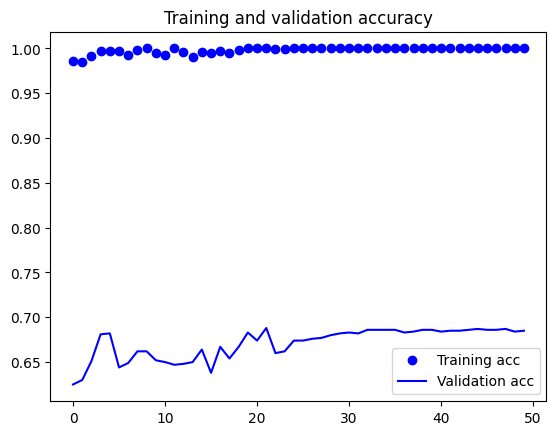

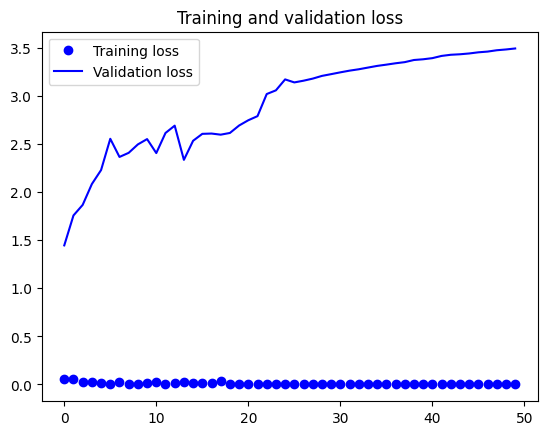

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [19]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    prediction = model.predict(x)
    if prediction[0] > 0.5:
        print(f"{fn} is a dog 🐶")
    else:
        print(f"{fn} is a cat 🐱")


Saving animal3.jpg to animal3 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
animal3 (1).jpg is a dog 🐶
